# Разбиение на тестовую и обучающую выборку в Python

Задача:  разбить набо данных на обучающую и тестовую выборки

In [ ]:
# Load relevant libraries.

%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import sklearn as skl

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Spam database
target_url = "https://datahub.io/machine-learning/spambase/r/spambase.csv"

spam = pd.read_csv(target_url)
print(spam.info())
print(spam['class'].describe())

HTTPError: HTTP Error 404: Not Found

In [ ]:
spam.head()

NameError: name 'spam' is not defined

## Вариант решения

### Использовать **pandas**

In [ ]:
spamtrain = spam.sample(frac = 0.67, random_state = 1066)
spamtest = spam.drop(spamtrain.index)

# Confirm data has been split properly.
print(spamtrain['class'].count())
print(spamtest['class'].count())
print(spam['class'].count())

## Вариант решения

### Использовать **train_test_split** из **sklearn.model_selection**

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("north_korea_missile_test_database.csv")
y = df["Missile Name"]
X = df.drop("Missile Name", axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=31
)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=31
)

In [ ]:
len(X_train)

In [ ]:
len(X_val)

In [ ]:
len(X_test)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

# Задания:
1. Подготовить pandas dataframe на основе "сырых" данных - https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/ **spambase.data spambase.names**
2. Провести его анализ на предмет сбалансированности классов.
3. Произвести разбиение на тестовую обучающую выборку с использованием https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.htmlhttps://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html **sklearn.model_selection.StratifiedShuffleSplit** в соотношении **80/20**, **70/30**


1 -------------- 

Столбцы: ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_fre

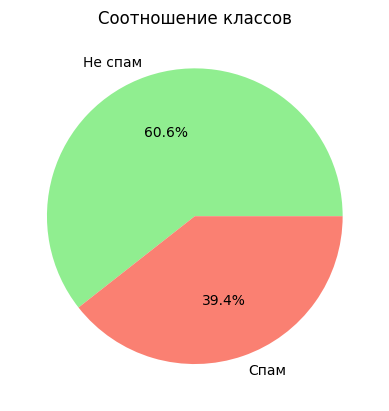

3 -------------- 

80/20 | Обучающая: 3680 Тестовая: 921
70/30 | Обучающая: 3220 Тестовая: 1381


In [2]:
import pandas as pd
import urllib.request

''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
#### 1 Подготовить pandas dataframe на основе "сырых" данных - https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/ spambase.data spambase.names. DataFrame — это двумерная табличная структура данных в библиотеке pandas. Её можно представить как таблицу, состоящую из строк и столбцов, где каждая колонка может содержать данные разного типа
print("1 -------------- \n")
# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
data = pd.read_csv(url, header=None)
# Загрузка и обработка названий столбцов
names_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names"
# Чтение файла с названиями
with urllib.request.urlopen(names_url) as response:
    names_text = response.read().decode('utf-8')
# Извлечение названий (игнорируем строки с метаданными)
names = []
for line in names_text.splitlines():
    if ":" in line and not line.startswith("|"):
        name = line.split(":")[0].strip()
        names.append(name)
names.append("class")  # Добавляем целевую переменную
# Присваиваем названия столбцам
data.columns = names
# Проверка результата
print("Столбцы:", data.columns.tolist())  # [5:] Вывод последних 5 столбцов
data.head()

''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
#### 2 Провести его анализ на предмет сбалансированности классов
print("2 -------------- \n")
# Распределение классов
class_dist = data["class"].value_counts(normalize=True)
print("Распределение классов:\n", class_dist)

# Визуализация
import matplotlib.pyplot as plt
plt.pie(
    class_dist,
    labels=["Не спам", "Спам"],
    autopct="%1.1f%%",
    colors=["lightgreen", "salmon"]
)
plt.title("Соотношение классов")
plt.show()

''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
#### 3 Произвести разбиение на тестовую обучающую выборку с использованием https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.htmlhttps://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html sklearn.model_selection.StratifiedShuffleSplit в соотношении 80/20, 70/30
print("3 -------------- \n")
from sklearn.model_selection import StratifiedShuffleSplit

# Для соотношения 80/20
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(data, data["class"]):
    train_80, test_20 = data.iloc[train_idx], data.iloc[test_idx]

# Для соотношения 70/30
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, test_idx in sss.split(data, data["class"]):
    train_70, test_30 = data.iloc[train_idx], data.iloc[test_idx]

# Проверка размеров
print("80/20 | Обучающая:", len(train_80), "Тестовая:", len(test_20))
print("70/30 | Обучающая:", len(train_70), "Тестовая:", len(test_30))